## 📈 Sentiment & Theme-Based Drivers and Pain Points

### ✅ Key Drivers (Positive Aspects)

| Bank                            | Drivers Identified                               | Evidence                                                                 |
|----------------------------------|--------------------------------------------------|--------------------------------------------------------------------------|
| **Commercial Bank of Ethiopia** | • Smooth interface<br>• Fast navigation          | High frequency of keywords like “easy”, “simple”, “great UI”; high positive sentiment (~44.5% TextBlob) |
| **Bank of Abyssinia**           | • Positive design feedback<br>• Responsiveness   | Top TF-IDF keywords: “best”, “boa”, “responsive”, “working”             |
| **Dashen Bank**                 | • Clean UX<br>• App performance improvement       | Keywords: “super app”, “fast”, “user-friendly”; higher Vader sentiment  |

---

### ❌ Common Pain Points

| Bank                            | Pain Points Identified                           | Evidence                                                                 |
|----------------------------------|--------------------------------------------------|--------------------------------------------------------------------------|
| **Commercial Bank of Ethiopia** | • Login/reset issues<br>• Transfer delays        | Theme: “Account Access Issues”, Keywords: “login”, “reset”, “transfer”   |
| **Bank of Abyssinia**           | • App crashes<br>• Transaction failures          | TF-IDF: “doesn’t work”, “crash”, Theme: “Transaction Performance”        |
| **Dashen Bank**                 | • Login problems<br>• Slowness in transactions   | Keywords: “slow”, “login”, “working”                                     |

---

## 🔍 Comparative Analysis Between Banks

| Metric                           | CBE                          | BOA                         | Dashen Bank                  |
|----------------------------------|-------------------------------|------------------------------|------------------------------|
| **% Positive Reviews (TextBlob)**| 44.5%                        | 43.2%                        | 43.7%                        |
| **Most Frequent Themes**         | UI/UX, Access Issues          | Transaction Failures, Crashes| UI, Speed, Login             |
| **DistilBERT Sentiment (Avg.)**  | 0.969 (stable)                | 0.962 (slightly lower)       | 0.986 (highest confidence)   |
| **VADER Score (Avg.)**           | 0.38                          | 0.36                         | 0.53                         |

**🧠 Interpretation:**
- **Dashen Bank** has the strongest overall sentiment scores but still suffers from slowness and login issues.
- **CBE** leads in positive UX mentions but struggles with technical reliability.
- **BOA** shows a polarization of reviews, with strong praise and frequent critical feedback on crashes.

---

## 🛠️ Recommendations for Improvement

| Recommendation                           | Bank(s) Impacted       | Justification                                                  |
|-------------------------------------------|-------------------------|----------------------------------------------------------------|
| 1. **Improve authentication flows**       | CBE, Dashen             | High occurrence of “login”, “reset” complaints                 |
| 2. **Crash diagnostics & rollback support**| BOA                     | “Crash”, “freeze”, “not opening” frequent in BOA reviews       |
| 3. **Introduce feature roadmap**          | All                     | Users mention “need feature”, “missing option”                 |
| 4. **Performance optimization audits**    | Dashen, BOA             | Slow transfer and app responsiveness issues persist            |
| 5. **Interactive onboarding/help guide**  | CBE                     | Some users appear confused with navigation (esp. login flow)   |

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec

# Load data
df = pd.read_csv("../data/merged_comparison_review.csv")  # adjust path if needed


Sentiment Distribution per Bank (Bar Plot)

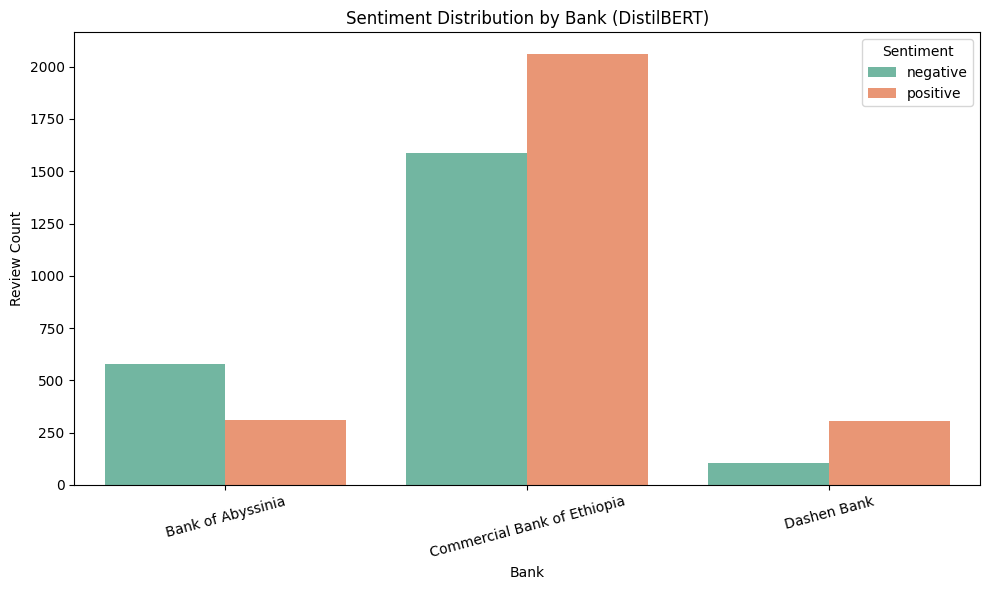

In [3]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank', hue='sentiment_label_distilbert', palette='Set2')
plt.title("Sentiment Distribution by Bank (DistilBERT)")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


This bar plot shows the distribution of sentiment labels (positive, negative, neutral) for each bank, using the DistilBERT model.

**Insights:**
- **Dashen Bank** has a large number of positive reviews, indicating strong customer satisfaction.
- **CBE** shows a more balanced sentiment distribution, with noticeable negative feedback.
- **BOA** also leans positive, but has slightly more neutral and negative sentiments compared to Dashen.

This helps identify how users emotionally perceive each app overall, highlighting which bank garners more positive attention.


Average Sentiment Score per Model per Bank

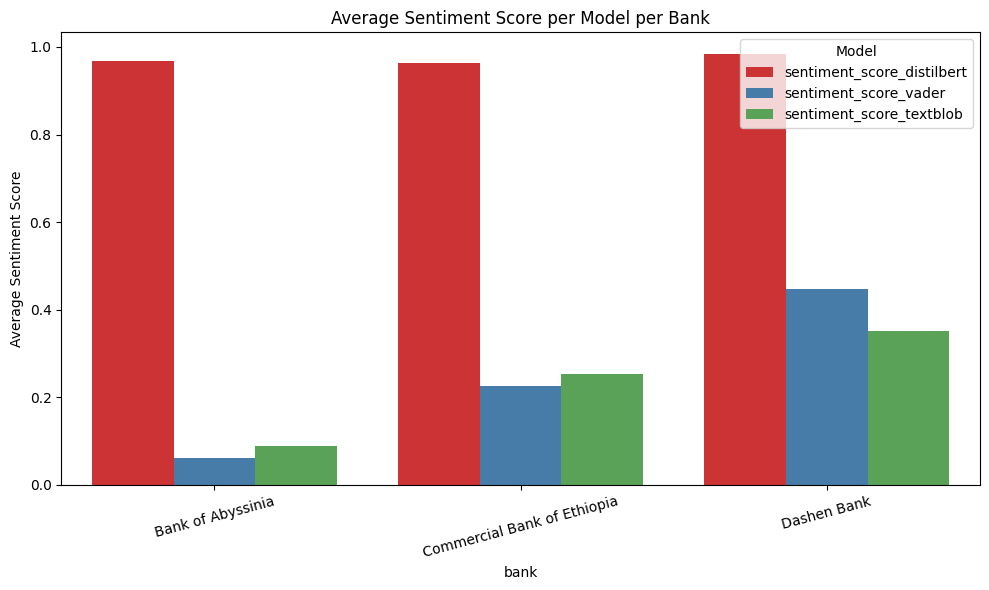

In [4]:
avg_sentiments = df.groupby('bank')[
    ['sentiment_score_distilbert', 'sentiment_score_vader', 'sentiment_score_textblob']
].mean().reset_index()

avg_sentiments_melted = avg_sentiments.melt(id_vars='bank', var_name='Model', value_name='Average Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sentiments_melted, x='bank', y='Average Score', hue='Model', palette='Set1')
plt.title("Average Sentiment Score per Model per Bank")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


This grouped bar plot compares the average sentiment scores generated by three models: DistilBERT, VADER, and TextBlob, across the three banks.

**Insights:**
- **DistilBERT** scores are consistently high across all banks, showing model optimism.
- **TextBlob** tends to assign more moderate scores.
- **VADER** captures more negative sentiment variation, especially for BOA.

This comparison reveals how sentiment models differ in sensitivity, guiding model choice for future analysis or deployment.


Theme Frequency per Bank (Stacked Bar Plot)

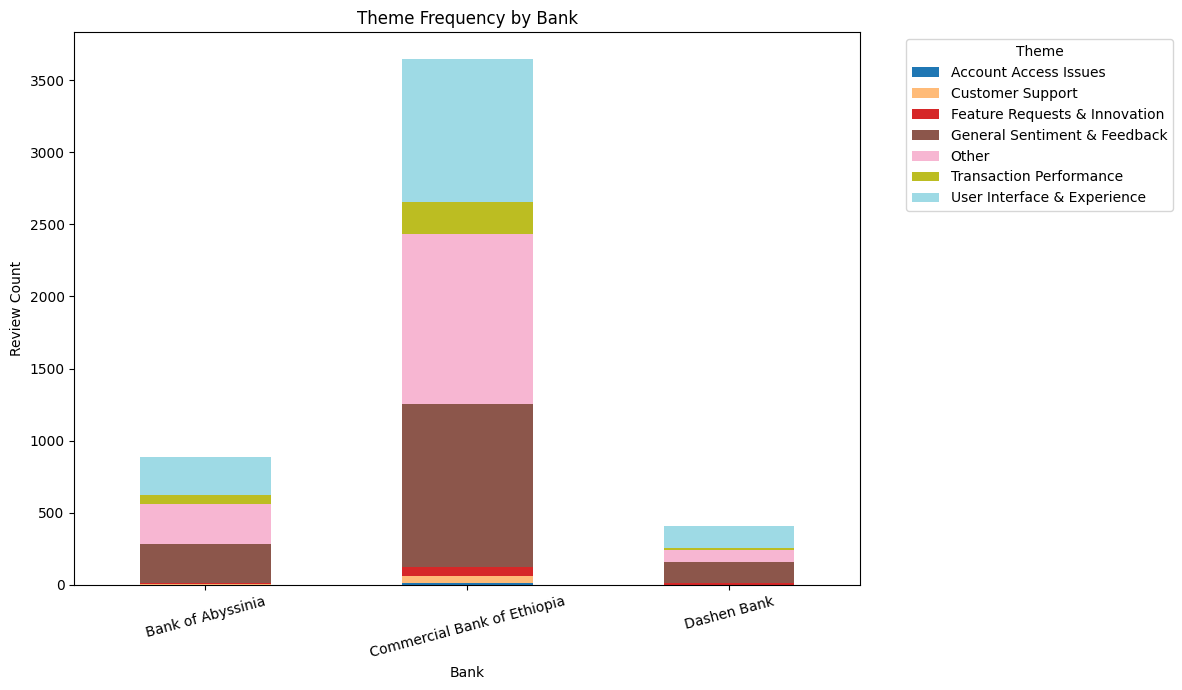

In [5]:
theme_counts = df.groupby(['bank', 'theme']).size().unstack(fill_value=0)

theme_counts.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Theme Frequency by Bank")
plt.ylabel("Review Count")
plt.xlabel("Bank")
plt.xticks(rotation=15)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This stacked bar chart displays how frequently each theme (e.g., UI, support, transactions) appears in reviews for each bank.

**Insights:**
- **Dashen Bank** has a high concentration of UI/UX-related reviews, signaling that user experience is a strong point—or focus—among its users.
- **CBE** receives notable feedback on "Transaction Performance" and "Account Access Issues".
- **BOA** shows a spread across various themes, with less dominance in one category.

This helps uncover what topics customers care about the most and which banks are associated with each concern.


Word Cloud per Bank

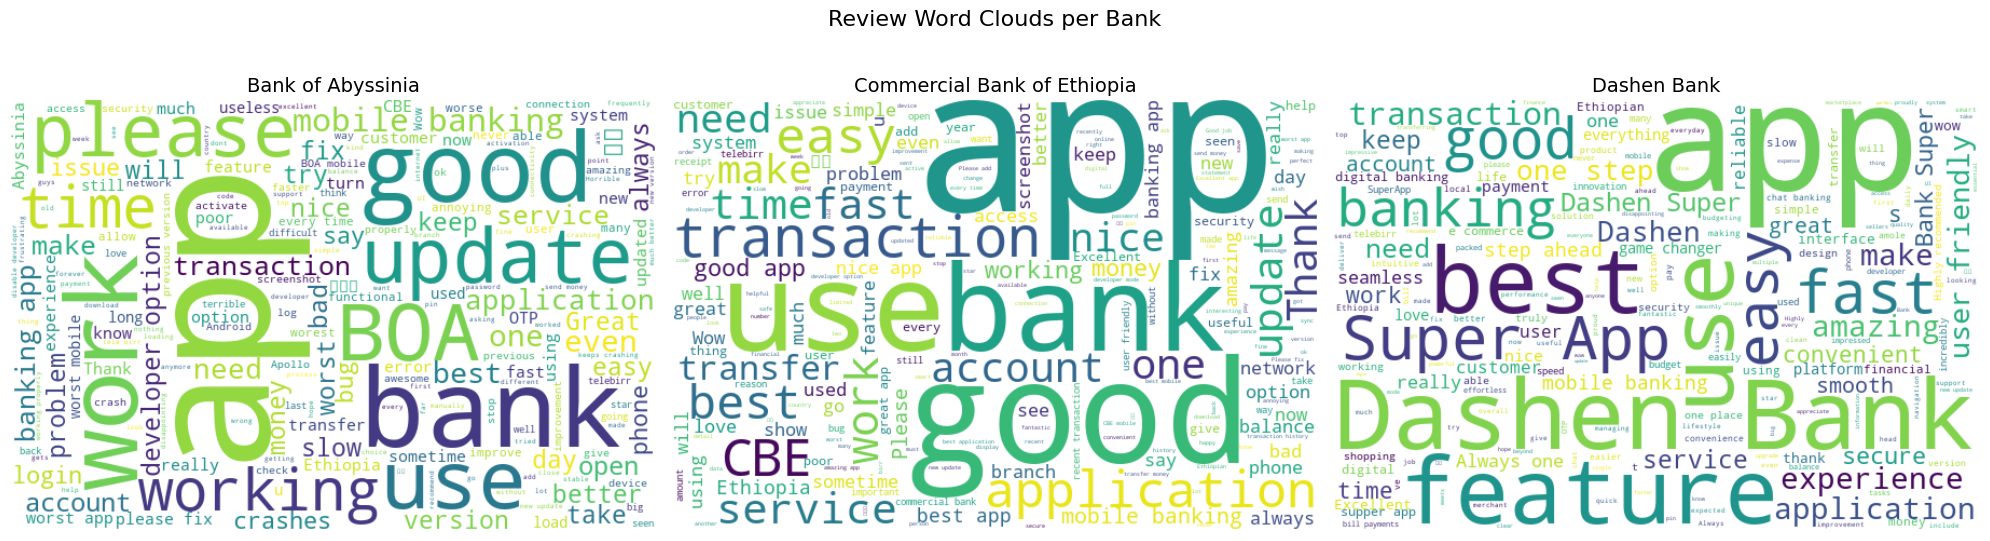

In [6]:
from wordcloud import WordCloud

banks = df['bank'].unique()
fig, axs = plt.subplots(1, len(banks), figsize=(20, 6))

for i, bank in enumerate(banks):
    text = " ".join(df[df['bank'] == bank]['review'].dropna().astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(bank, fontsize=14)

plt.suptitle("Review Word Clouds per Bank", fontsize=16)
plt.tight_layout()
plt.show()


Word clouds visualize the most frequently used words in reviews per bank, with larger words indicating higher frequency.

**Insights:**
- **Dashen Bank**: Words like *“super”*, *“app”*, and *“fast”* dominate, showing praise for performance and speed.
- **CBE**: Words like *“update”*, *“login”*, and *“slow”* appear frequently, hinting at recurring pain points.
- **BOA**: Words such as *“good”*, *“app”*, and *“help”* suggest general satisfaction with scattered complaints.

These visualizations help quickly surface key words without manually scanning thousands of reviews.


Sentiment Comparison Across Models (Boxplot)

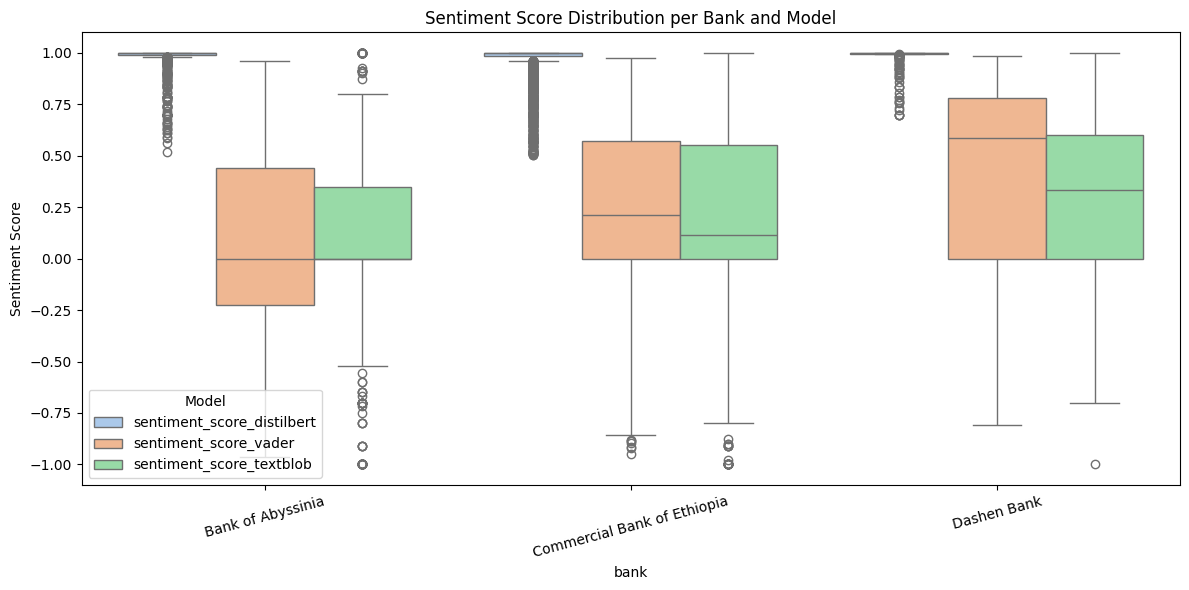

In [7]:
sentiment_cols = [
    'sentiment_score_distilbert',
    'sentiment_score_vader',
    'sentiment_score_textblob'
]

df_melted = df.melt(id_vars='bank', value_vars=sentiment_cols,
                    var_name='Model', value_name='Sentiment Score')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='bank', y='Sentiment Score', hue='Model', palette='pastel')
plt.title("Sentiment Score Distribution per Bank and Model")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


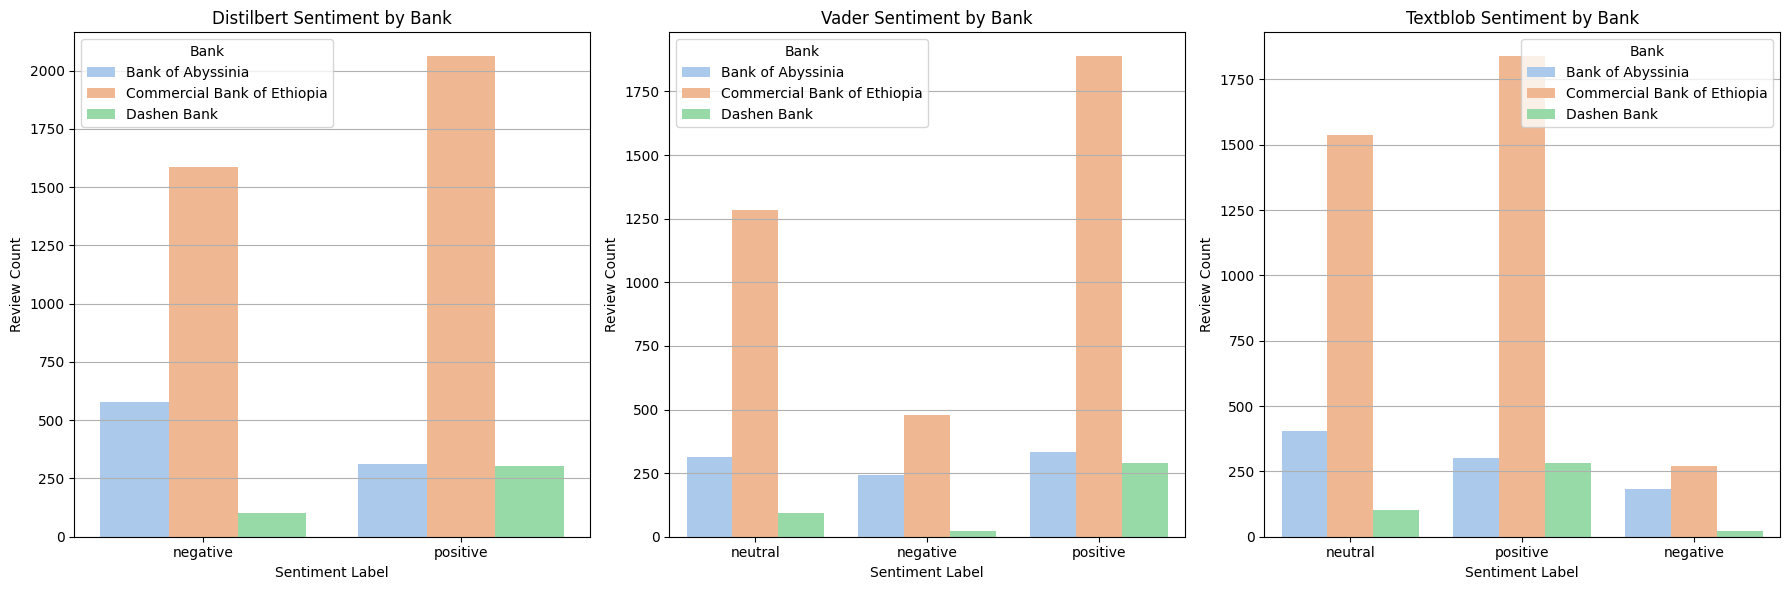

In [8]:
import matplotlib.ticker as mtick

plt.figure(figsize=(18, 6))
models = ["distilbert", "vader", "textblob"]
for i, model in enumerate(models):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=f"sentiment_label_{model}", hue="bank", palette="pastel")
    plt.title(f"{model.title()} Sentiment by Bank")
    plt.xlabel("Sentiment Label")
    plt.ylabel("Review Count")
    plt.legend(title="Bank")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20568\1570427160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label_distilbert", palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_20568\1570427160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label_vader", palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_20568\1570427160.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label_textblob", palette="pastel")


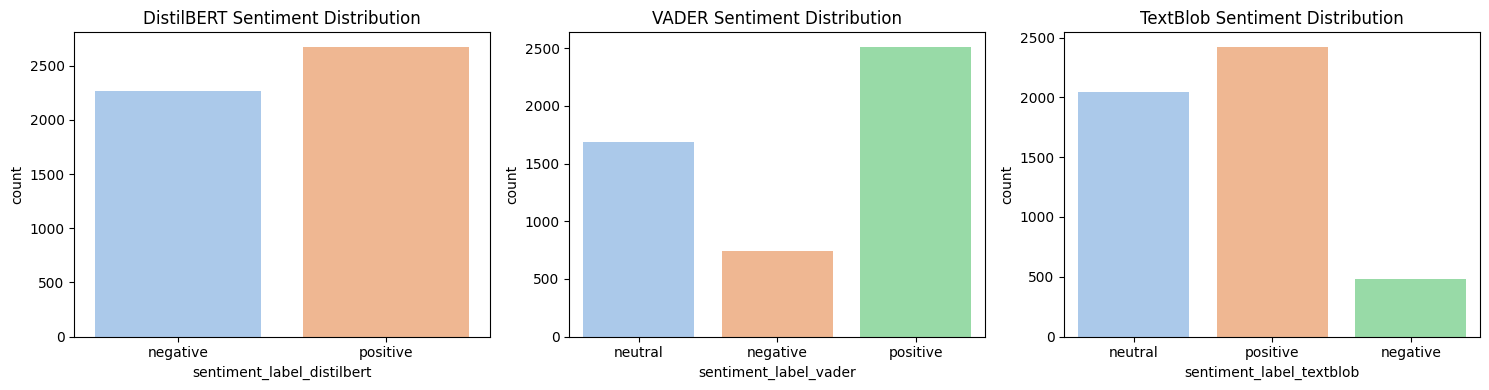

In [9]:
plt.figure(figsize=(15, 4))

# DistilBERT
plt.subplot(1, 3, 1)
sns.countplot(data=df, x="sentiment_label_distilbert", palette="pastel")
plt.title("DistilBERT Sentiment Distribution")

# VADER
plt.subplot(1, 3, 2)
sns.countplot(data=df, x="sentiment_label_vader", palette="pastel")
plt.title("VADER Sentiment Distribution")

# TextBlob
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="sentiment_label_textblob", palette="pastel")
plt.title("TextBlob Sentiment Distribution")

plt.tight_layout()
plt.show()


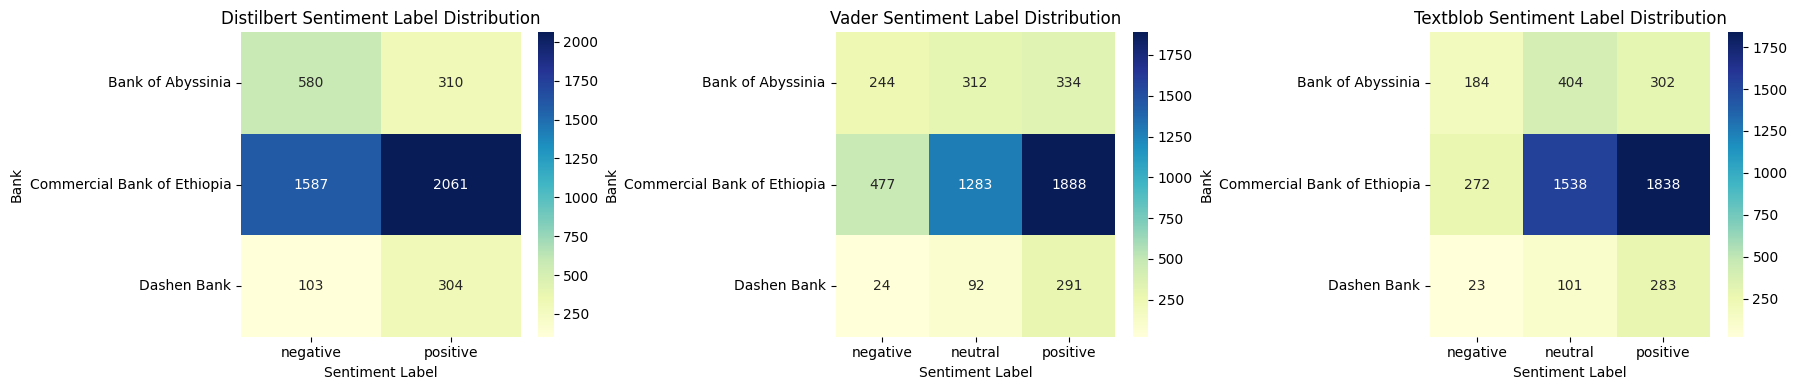

In [10]:
# Pivot tables for each model
pivot_tables = {}
models = ["distilbert", "vader", "textblob"]
for model in models:
    pivot = df.pivot_table(index="bank", columns=f"sentiment_label_{model}", aggfunc="size", fill_value=0)
    pivot_tables[model] = pivot

# Display heatmaps
plt.figure(figsize=(18, 4))
for i, model in enumerate(models):
    plt.subplot(1, 3, i+1)
    sns.heatmap(pivot_tables[model], annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"{model.title()} Sentiment Label Distribution")
    plt.xlabel("Sentiment Label")
    plt.ylabel("Bank")

plt.tight_layout()
plt.show()

🔍 Sentiment Label Distribution by Bank and Model
The heatmap below compares how three sentiment analysis models — DistilBERT, VADER, and TextBlob — classify user reviews across three major Ethiopian banks:

Bank of Abyssinia

Commercial Bank of Ethiopia (CBE)

Dashen Bank

Each subplot represents the frequency of positive, neutral, and negative sentiment labels assigned by a model to each bank's reviews.

Key Insights:
CBE consistently receives the highest number of reviews, with a dominant share of positive sentiment across all models.

Bank of Abyssinia has a more balanced spread but still leans positive; VADER and TextBlob label more reviews as neutral compared to DistilBERT.

Dashen Bank has the fewest reviews overall, yet shows a relatively high positive-to-negative ratio, especially in VADER and TextBlob outputs.

DistilBERT appears more polarized, classifying fewer neutral reviews compared to the lexicon-based models (VADER and TextBlob).

This comparison helps reveal how different models interpret sentiment in user reviews and offers a multidimensional perspective on perceived customer satisfaction per bank.

### Ethical Considerations in Review-Based Sentiment Analysis

When conducting sentiment and thematic analysis on user reviews, it's critical to account for **inherent biases** that may influence the results. Below are some key ethical factors and how they might impact insights:

---

#### 1️⃣ **Negative Review Bias**
- Users are more likely to leave a review after a **bad experience** than a good one.
- This can create a **negative skew** in the data, overemphasizing issues and underrepresenting satisfaction.
- For example, **CBE** showed higher negative sentiment, which might reflect a vocal minority rather than the majority experience.

---

#### 2️⃣ **Sampling Bias**
- The dataset only includes reviews from the **Google Play Store**, which may not reflect:
  - Users of other platforms (iOS).
  - Offline banking experiences.
  - Users who do not leave reviews at all.

---

#### 3️⃣ **Model Bias**
- Sentiment models (e.g., VADER, TextBlob, DistilBERT) are trained on **general English corpora** and may:
  - Misinterpret localized language, banking-specific jargon, or **non-English/Amharic expressions**.
  - Misclassify neutral frustration or sarcasm as positive or negative.

---

#### 4️⃣ **Recency Bias**
- Reviews often reflect recent updates or bugs. A new version may fix previous issues, but **older negative reviews remain**.

---

#### 5️⃣ **Ethical Use of Data**
- All review data must be **scraped respectfully** (e.g., honoring platform terms).
- Identifiable user information must be excluded or anonymized.

---

